# Prepare the data and basic EDA

## Data loading

**Remember to load the kaggle.json file before running the code, this is to create the API.**

In [1]:
# install
!pip install kaggle
!pip install polars

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# import
import os 

# environment
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [3]:
# download the data
! kaggle datasets download -d davidgauthier/glassdoor-job-reviews

glassdoor-job-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# unzip it
! unzip \*.zip

Archive:  glassdoor-job-reviews.zip
replace glassdoor_reviews.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: [n]
error:  invalid response [[n]]
replace glassdoor_reviews.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error:  invalid response [{ENTER}]
replace glassdoor_reviews.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error:  invalid response [{ENTER}]
replace glassdoor_reviews.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: [y]
error:  invalid response [[y]]
replace glassdoor_reviews.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error:  invalid response [{ENTER}]
replace glassdoor_reviews.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: [y]
error:  invalid response [[y]]
replace glassdoor_reviews.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: glassdoor_reviews.csv   


## Understanding the data

In [5]:
# import
import polars as pl

In [6]:
# load the data
df = pl.read_csv("/content/glassdoor_reviews.csv")
# check the data
df

firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
str,str,str,str,str,i64,f64,f64,f64,f64,f64,f64,str,str,str,str,str,str
"""AFH-Wealth-Man…","""2015-04-05""",""" ""","""Current Employ…",null,2,4.0,3.0,null,2.0,3.0,3.0,"""x""","""o""","""r""","""Young colleagu…","""Very friendly …","""Poor salaries,…"
"""AFH-Wealth-Man…","""2015-12-11""",""" Office Admini…","""Current Employ…","""Bromsgrove, En…",2,3.0,1.0,null,2.0,1.0,4.0,"""x""","""o""","""r""","""Excellent staf…","""Friendly, help…","""Poor salary wh…"
"""AFH-Wealth-Man…","""2016-01-28""",""" Office Admini…","""Current Employ…","""Bromsgrove, En…",1,1.0,1.0,null,1.0,1.0,1.0,"""x""","""o""","""x""","""Low salary, ba…","""Easy to get th…","""Very low salar…"
"""AFH-Wealth-Man…","""2016-04-16""",""" ""","""Current Employ…",null,5,2.0,3.0,null,2.0,2.0,3.0,"""x""","""o""","""r""","""Over promised …","""Nice staff to …","""No career prog…"
"""AFH-Wealth-Man…","""2016-04-23""",""" Office Admini…","""Current Employ…","""Bromsgrove, En…",1,2.0,1.0,null,2.0,1.0,1.0,"""x""","""o""","""x""","""client reporti…","""Easy to get th…","""Abysmal pay, a…"
"""AFH-Wealth-Man…","""2016-05-26""",""" Office Admini…","""Current Employ…",null,3,4.0,2.0,null,2.0,3.0,2.0,"""o""","""r""","""r""","""Office adminis…","""Some good peop…","""Morale. Lack …"
"""AFH-Wealth-Man…","""2016-09-23""",""" IFA""","""Former Employe…","""Bromsgrove, En…",1,1.0,1.0,null,1.0,1.0,1.0,"""x""","""o""","""r""","""It horrible ma…","""Good investmen…","""The management…"
"""AFH-Wealth-Man…","""2016-09-25""",""" Anonymous Emp…","""Current Employ…","""Century City, …",5,5.0,5.0,null,5.0,4.0,5.0,"""v""","""o""","""v""","""Good place to …","""The people are…","""Wouldn't neces…"
"""AFH-Wealth-Man…","""2016-11-03""",""" Anonymous Emp…","""Former Employe…",null,4,4.0,4.0,null,4.0,4.0,4.0,"""v""","""o""","""v""","""I liked workin…","""Nice Staff, go…","""Can't really t…"


In [7]:
# check columns
df.columns

['firm',
 'date_review',
 'job_title',
 'current',
 'location',
 'overall_rating',
 'work_life_balance',
 'culture_values',
 'diversity_inclusion',
 'career_opp',
 'comp_benefits',
 'senior_mgmt',
 'recommend',
 'ceo_approv',
 'outlook',
 'headline',
 'pros',
 'cons']

In [8]:
# check data type
df.dtypes

[Utf8,
 Utf8,
 Utf8,
 Utf8,
 Utf8,
 Int64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Utf8,
 Utf8,
 Utf8,
 Utf8,
 Utf8,
 Utf8]

In [9]:
# count the rows
rowCount = df.shape[0]
print("Total number of rows in the dataset:", rowCount)

Total number of rows in the dataset: 838566


In [10]:
# display the number of unique values in the 'firm' column
uniqueSeasons = df['firm'].n_unique()
print("Number of unique values in the 'firm' column:", uniqueSeasons)

Number of unique values in the 'firm' column: 428


In [11]:
# find the null data
null_count_df = df.null_count()
# check null data count
null_count_df

firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,297338,0,149894,191373,702500,147501,150082,155876,0,0,0,2219,0,8


## Data cleaning

Before cleaning the data, we first select the interesting columns in our dataset

In [12]:
# select interesting columns in order to work on a new df
df = df.select(
    ['firm', 'date_review', 'job_title', 'location', 'work_life_balance', 'diversity_inclusion']
)
# check the data
df

firm,date_review,job_title,location,work_life_balance,diversity_inclusion
str,str,str,str,f64,f64
"""AFH-Wealth-Man…","""2015-04-05""",""" """,null,4.0,null
"""AFH-Wealth-Man…","""2015-12-11""",""" Office Admini…","""Bromsgrove, En…",3.0,null
"""AFH-Wealth-Man…","""2016-01-28""",""" Office Admini…","""Bromsgrove, En…",1.0,null
"""AFH-Wealth-Man…","""2016-04-16""",""" """,null,2.0,null
"""AFH-Wealth-Man…","""2016-04-23""",""" Office Admini…","""Bromsgrove, En…",2.0,null
"""AFH-Wealth-Man…","""2016-05-26""",""" Office Admini…",null,4.0,null
"""AFH-Wealth-Man…","""2016-09-23""",""" IFA""","""Bromsgrove, En…",1.0,null
"""AFH-Wealth-Man…","""2016-09-25""",""" Anonymous Emp…","""Century City, …",5.0,null
"""AFH-Wealth-Man…","""2016-11-03""",""" Anonymous Emp…",null,4.0,null


In [13]:
# find the null data in our new df
null_count_df = df.null_count()
# check null data count
null_count_df

firm,date_review,job_title,location,work_life_balance,diversity_inclusion
u32,u32,u32,u32,u32,u32
0,0,0,297338,149894,702500


As there are many null values in the 'diversity_inclusion' column, we will just drop it

In [14]:
# drop the column
df = df.drop('diversity_inclusion')
#check the data
df.head()

firm,date_review,job_title,location,work_life_balance
str,str,str,str,f64
"""AFH-Wealth-Man…","""2015-04-05""",""" """,null,4.0
"""AFH-Wealth-Man…","""2015-12-11""",""" Office Admini…","""Bromsgrove, En…",3.0
"""AFH-Wealth-Man…","""2016-01-28""",""" Office Admini…","""Bromsgrove, En…",1.0
"""AFH-Wealth-Man…","""2016-04-16""",""" """,null,2.0
"""AFH-Wealth-Man…","""2016-04-23""",""" Office Admini…","""Bromsgrove, En…",2.0


In [15]:
# drop now the missing values
df = df.drop_nulls()
# check the data
df

firm,date_review,job_title,location,work_life_balance
str,str,str,str,f64
"""AFH-Wealth-Man…","""2015-12-11""",""" Office Admini…","""Bromsgrove, En…",3.0
"""AFH-Wealth-Man…","""2016-01-28""",""" Office Admini…","""Bromsgrove, En…",1.0
"""AFH-Wealth-Man…","""2016-04-23""",""" Office Admini…","""Bromsgrove, En…",2.0
"""AFH-Wealth-Man…","""2016-09-23""",""" IFA""","""Bromsgrove, En…",1.0
"""AFH-Wealth-Man…","""2016-09-25""",""" Anonymous Emp…","""Century City, …",5.0
"""AFH-Wealth-Man…","""2017-02-21""",""" Technician""","""Santa Ana, CA""",1.0
"""AFH-Wealth-Man…","""2017-03-06""",""" Administrativ…","""San Juan Capis…",3.0
"""AFH-Wealth-Man…","""2017-03-10""",""" Administrativ…","""Orange, CA""",2.0
"""AFH-Wealth-Man…","""2017-05-21""",""" Administrativ…","""Birmingham, En…",4.0


## Data visualization

Perform a basic count on which companies have the most job offers

In [16]:
# create a group by to see how many job offers are posted by each firm, order it
job_offers_companies_df = df.groupby('firm').count()
# check the data
job_offers_companies_df

firm,count
str,u32
"""Citizens-Advic…",145
"""Brewin-Dolphin…",82
"""AXA-UK""",171
"""Rentokil-Initi…",586
"""HM-Treasury""",59
"""Tesco""",6219
"""The-Access-Gro…",228
"""Balfour-Beatty…",524
"""Thomson-Reuter…",5852


In [17]:
# sort the df
job_offers_companies_df = job_offers_companies_df.sort('count').reverse()
# check the data
job_offers_companies_df

firm,count
str,u32
"""IBM""",35016
"""Deloitte""",26393
"""McDonald-s""",22783
"""EY""",19507
"""Oracle""",18433
"""PwC""",17568
"""Microsoft""",16118
"""J-P-Morgan""",14674
"""KPMG""",13482


We are gonna filter the 'job_offers_companies_df' for those companies that have more than 9000 job offers, in order to get meaningful insights on companies that used the platform to hire employees:

In [18]:
# filter
job_offers_companies_df = job_offers_companies_df.filter(pl.col("count") > 9000)
# check the data
job_offers_companies_df

firm,count
str,u32
"""IBM""",35016
"""Deloitte""",26393
"""McDonald-s""",22783
"""EY""",19507
"""Oracle""",18433
"""PwC""",17568
"""Microsoft""",16118
"""J-P-Morgan""",14674
"""KPMG""",13482


Now, get a df which includes these companies and all the features selected at the beginning of this chapter:

In [19]:
# create a list
list = job_offers_companies_df['firm'].to_list()

In [20]:
# filter the df using the list extracted before
popular_companies_df = df.filter((pl.col("firm").is_in(list)))
# rename the data
df = popular_companies_df
# check the data
df

firm,date_review,job_title,location,work_life_balance
str,str,str,str,f64
"""Apple""","""2008-01-31""",""" Senior Produc…","""Cupertino, CA""",3.0
"""Apple""","""2008-02-14""",""" Software Engi…","""Cupertino, CA""",4.0
"""Apple""","""2008-02-15""",""" Product Manag…","""Cupertino, CA""",4.0
"""Apple""","""2008-04-20""",""" Concierge""","""Seattle, WA""",5.0
"""Apple""","""2008-04-20""",""" Mac Genius""","""Louisville, KY…",3.0
"""Apple""","""2008-04-20""",""" Mac Genius""","""Chestnut Hill,…",3.0
"""Apple""","""2008-04-20""",""" Mac Specialis…","""San Diego, CA""",5.0
"""Apple""","""2008-04-20""",""" Mac Specialis…","""Stanford, CA""",5.0
"""Apple""","""2008-04-20""",""" Mac Specialis…","""Paramus, NJ""",5.0


Visualize the **work life balance** feature using both histogram and pie chart

In [21]:
# group by the df by the interesting feature and count the number of firms offering job positions
df_work_life_balance = df.groupby('work_life_balance').agg(pl.col('firm').count().alias('number of companies'))
# check the data 
df_work_life_balance

work_life_balance,number of companies
f64,u32
5.0,48458
4.0,53359
2.0,32605
1.0,26588
3.0,54237


<BarContainer object of 5 artists>

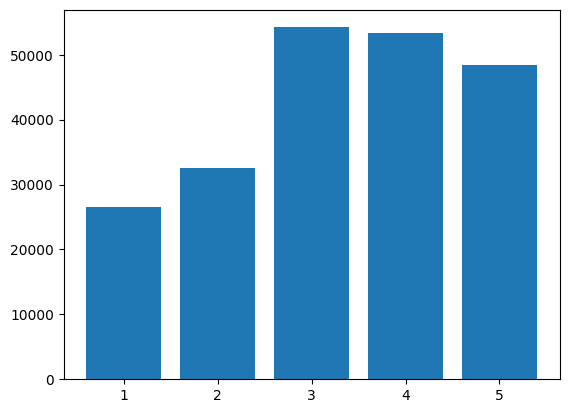

In [22]:
# import
import matplotlib.pyplot as plt
# visualize a histogram
plt.bar(df_work_life_balance['work_life_balance'], df_work_life_balance['number of companies'])

In [24]:
# import
import plotly.express as px
# visualize pie chart with plotly
px.pie(df_work_life_balance,                              
    names = df_work_life_balance['work_life_balance'],
    values = df_work_life_balance['number of companies'],
    color_discrete_sequence= px.colors.sequential.Plasma_r)

Visualize data based on the **job title** feature in order to see which kind of jobs are popular

In [25]:
# create the df using groupby
df_job_title = df.groupby('job_title').count().sort(by='count')
# get the top 20 job positions
df_job_title = df_job_title.tail(25)
# check the data
df_job_title

job_title,count
str,u32
""" Audit Senior …",1036
""" Mcdonalds Cre…",1294
""" Applications …",1391
""" Specialist""",1392
""" Software Deve…",1408
""" Audit Senior""",1425
""" Vice Presiden…",1529
""" Business Anal…",1639
""" Project Manag…",1756


In [30]:
# drop the "" row
df_job_title = df_job_title.filter(pl.col('count') != 6812)
# check the data
df_job_title

job_title,count
str,u32
""" Audit Senior …",1036
""" Mcdonalds Cre…",1294
""" Applications …",1391
""" Specialist""",1392
""" Software Deve…",1408
""" Audit Senior""",1425
""" Vice Presiden…",1529
""" Business Anal…",1639
""" Project Manag…",1756


Text(0, 0.5, 'Job Titles')

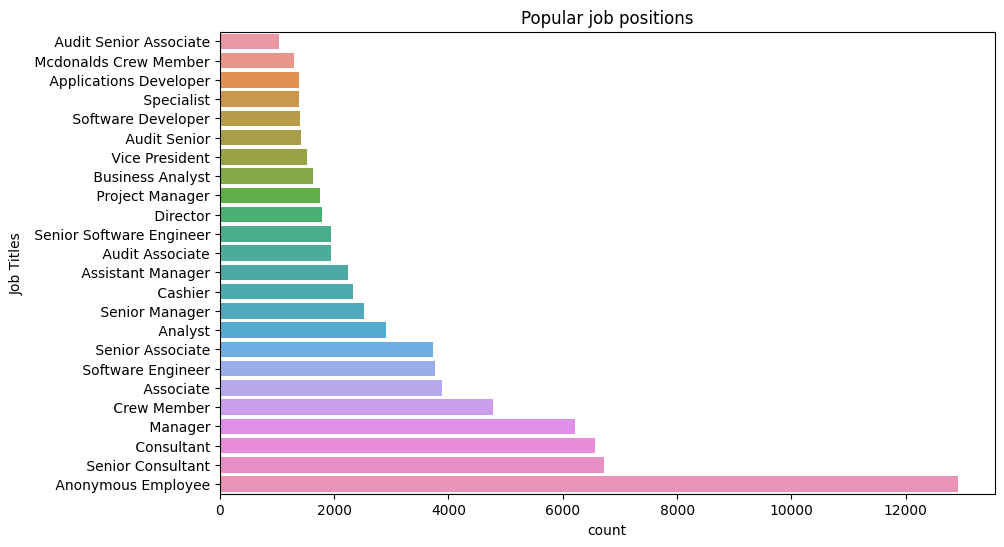

In [43]:
# convert the Polars DataFrame to a pandas DataFrame
df_pd = df_job_title.to_pandas()

# set the width and height of the figure
plt.figure(figsize=(10,6))

# add title
plt.title("Popular job positions")

# create a bar chart
sns.barplot(x=df_pd['count'], y=df_pd['job_title'])

# add label for vertical axis
plt.ylabel("Job Titles")

Visualize the **average work life balance** per each company

In [47]:
# create the df using groupby to see the avg work life balance per company
average_work_life_balance = df.groupby('firm').agg(pl.col('work_life_balance').mean())
# chech the data
average_work_life_balance

firm,work_life_balance
str,f64
"""PwC""",2.799408
"""Citi""",3.262052
"""J-P-Morgan""",3.310754
"""SAP""",4.197134
"""Microsoft""",3.687182
"""Deloitte""",2.928049
"""McDonald-s""",3.187815
"""KPMG""",2.803219
"""IBM""",3.658956


Text(0, 0.5, 'Copmanies')

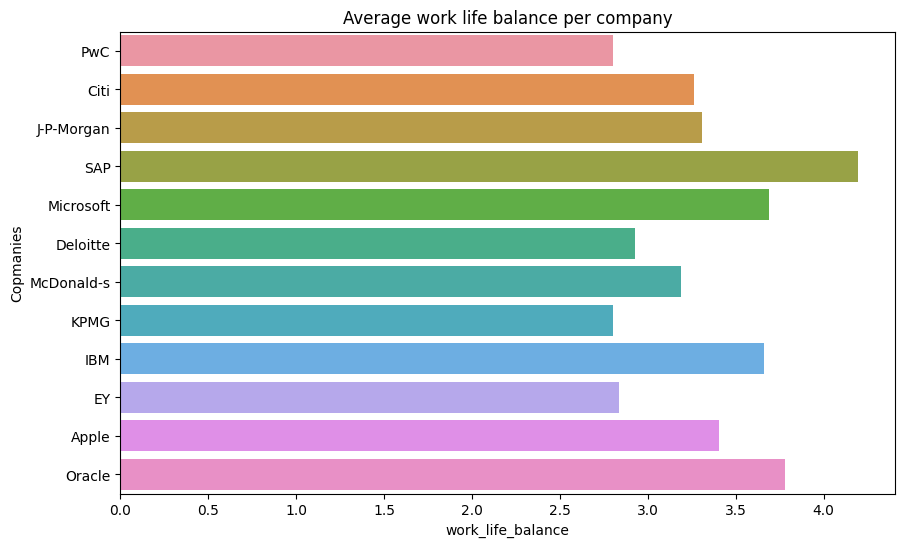

In [50]:
# convert the Polars DataFrame to a pandas DataFrame
df_pd = average_work_life_balance.to_pandas()

# set the width and height of the figure
plt.figure(figsize=(10,6))

# add title
plt.title("Average work life balance per company")

# create a bar chart
sns.barplot(x=df_pd['work_life_balance'], y=df_pd['firm'])

# add label for vertical axis
plt.ylabel("Copmanies")

Visualize **each firms work life balance** according to it's job offers

Text(0, 0.5, 'Count of job offers within life balance rate')

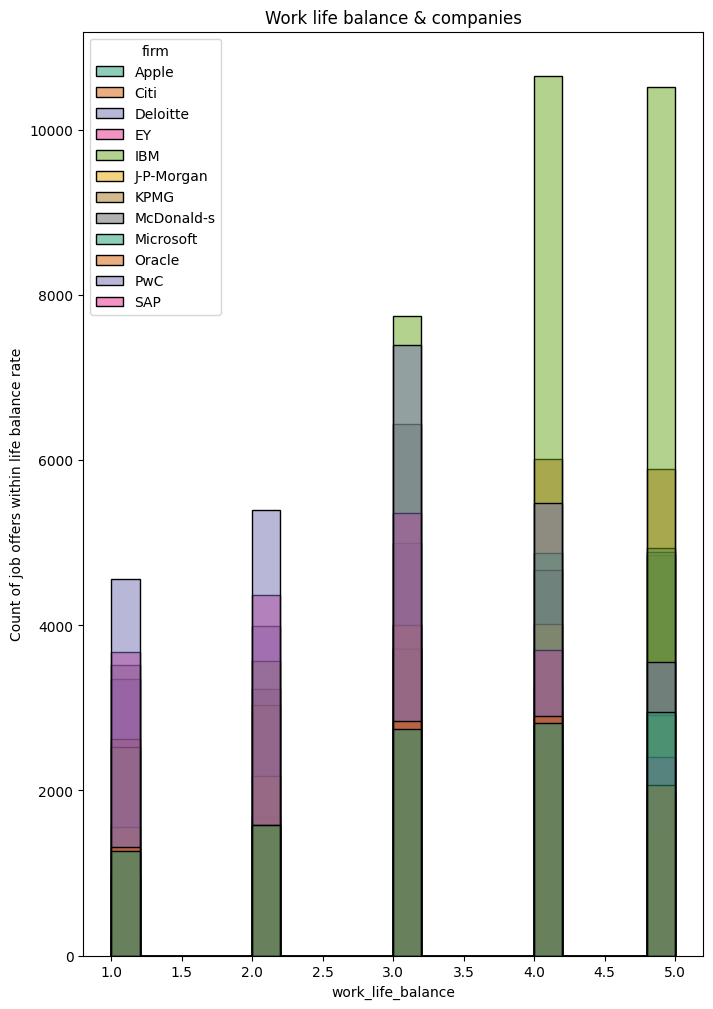

In [79]:
# set the width and height of the figure
plt.figure(figsize=(8,12))

# add title
plt.title("Work life balance & companies")

# histograms for each firm & work life balances
sns.histplot(data=df, x='work_life_balance', hue='firm', bins=20, palette='Dark2')

# add label for vertical axis
plt.ylabel("Count of job offers within life balance rate")